In [1]:
import os
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import sklearn as sk
import os
import time
import datetime

In [4]:
path = '/home/catherinej/Downloads'
file = os.path.join(path, 'IrmaMudThicknessComparisons - Original Data.csv')
mud = pd.read_csv(file)
mud
# mud.head()
# mud.info()
# mud.describe()

,Region,Site,Station,Date 1,Date 2,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Lat,Lon,water_lat,water_lon,Notes,Unnamed: 12
0,TTI,CCB,CC1 S1,12/20/2017,1/28/2018,0,0.00,26.02238,-81.73427,26.021769,-81.734467,NaN,NaN
1,TTI,CCB,CC1 S2,12/20/2017,NaN,0,NaN,26.02240,-81.73423,26.021769,-81.734467,NaN,NaN
2,TTI,CCB,CC1 S3,12/20/2017,NaN,0,NaN,26.02230,-81.73427,26.021769,-81.734467,NaN,NaN
3,TTI,CCB,CC1 S4,12/20/2017,NaN,40,NaN,26.02232,-81.73418,26.021769,-81.734467,NaN,NaN
4,TTI,CCB,CC2 S1,12/20/2017,1/28/2018,0,0.00,26.02202,-81.73415,26.021769,-81.734467,NaN,NaN
5,TTI,CCB,CC2 S2,12/20/2017,NaN,0,NaN,26.02203,-81.73413,26.021769,-81.734467,NaN,NaN
6,TTI,CCB,CC2 S3,12/20/2017,NaN,0,NaN,26.02207,-81.73410,26.021769,-81.734467,NaN,NaN
7,TTI,CCB,CC2 S4,12/20/2017,NaN,0,NaN,26.02208,-81.73412,26.021769,-81.734467,NaN,NaN
8,TTI,CCB,CC3 S1,12/20/2017,1/28/2018,0,0.00,26.02143,-81.73410,26.021769,-81.734467,NaN,NaN
9,TTI,CCB,CC3 S2,12/20/2017,NaN,0,NaN,26.02143,-81.73402,26.021769,-81.734467,NaN,NaN


In [5]:
# t = datetime.datetime()
mud['Date 1'] =  mud['Date 1'].dt.total_seconds()
# for dates in mud['Date 1']:
#     t = datetime.datetime.fromtimestamp(dates)
#   year, month, day   t = datetime.datetime(dates)
#     print(t)
# >>> t = datetime.datetime(2011, 10, 21, 0, 0)
# >>> time.mktime(t.timetuple())
# 1319148000.0
# for dates in mud['Date 1']:
#     dates.total_seconds
#     year, month, day, hour, minutes, seconds = dates

AttributeError: Can only use .dt accessor with datetimelike values

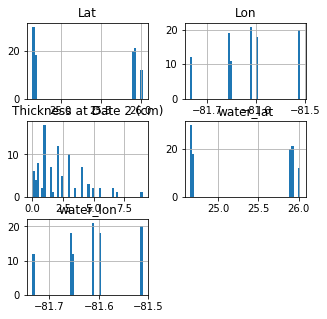

In [6]:
mud.hist(bins=50, figsize=(5,5))
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit()
for train_index, test_index in split.split(mud, mud['Site']):
    mud_train_set = mud.loc[train_index]
    mud_test_set = mud.loc[test_index]

In [8]:
mud['Site'].value_counts()

UFU      20
CBD      18
SNK      18
LAD      15
WTZ      12
BW2      12
CCB      12
FBTBM    10
BW3      10
Name: Site, dtype: int64

In [182]:
# mud.plot(kind='scatter', x='Lon', y="Lat", alpha=0.4,
#         cmap=plt.get_cmap('jet'), colorbar=True)
# plt.legend()

In [183]:
corr_matrix = mud.corr()
for key in corr_matrix:
    print(key)
corr_matrix['Thickness at Date 2 (cm)'].sort_values(ascending=False)

Thickness at Date 2 (cm)
Lat
Lon


Thickness at Date 2 (cm)    1.000000
Lat                        -0.018557
Lon                        -0.105098
Name: Thickness at Date 2 (cm), dtype: float64

/home/catherinej/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7aa126a58>,
      dtype=object)

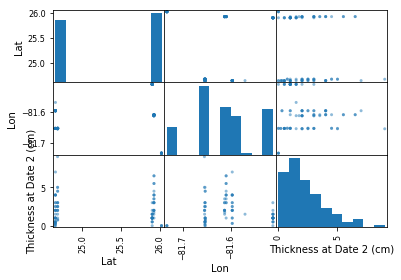

In [184]:
attributes = ['Lat', 'Lon', 'Thickness at Date 1 (cm)', 'Thickness at Date 2 (cm)',
             ]

pd.tools.plotting.scatter_matrix(mud[attributes], figsize=(6,4))

In [185]:
data = mud.drop('Notes', axis=1)
data.dropna(subset=['Thickness at Date 1 (cm)'])
data.dropna(subset=['Thickness at Date 2 (cm)'])
data

,Region,Site,Station,Date 1,Date 2,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Lat,Lon
0,TTI,CCB,CC1 S1,2017-12-20,2018-01-28,0,0.00,26.022383,-81.734267
1,TTI,CCB,CC1 S2,2017-12-20,NaT,0,NaN,26.022400,-81.734233
2,TTI,CCB,CC1 S3,2017-12-20,NaT,0,NaN,26.022300,-81.734267
3,TTI,CCB,CC1 S4,2017-12-20,NaT,40,NaN,26.022317,-81.734183
4,TTI,CCB,CC2 S1,2017-12-20,2018-01-28,0,0.00,26.022017,-81.734150
5,TTI,CCB,CC2 S2,2017-12-20,NaT,0,NaN,26.022033,-81.734133
6,TTI,CCB,CC2 S3,2017-12-20,NaT,0,NaN,26.022067,-81.734100
7,TTI,CCB,CC2 S4,2017-12-20,NaT,0,NaN,26.022083,-81.734117
8,TTI,CCB,CC3 S1,2017-12-20,2018-01-28,0,0.00,26.021433,-81.734100
9,TTI,CCB,CC3 S2,2017-12-20,NaT,0,NaN,26.021433,-81.734017


In [186]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
mud_num = data.drop('Region', axis=1)
mud_num = mud_num.drop('Site', axis=1)
mud_num = mud_num.drop('Station', axis=1)
mud_num = mud_num.dropna(subset=['Date 2'])
mud_num = mud_num.dropna(subset=['Thickness at Date 2 (cm)'])

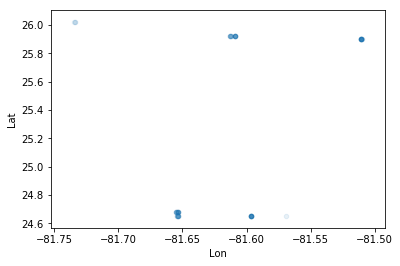

In [187]:

mud_num.plot(kind='scatter',x='Lon', y='Lat', alpha=0.1)

In [188]:
# for t in mud_num['Thickness at Date 1 (cm)']:
mud_num = mud_num.replace('<0.1', 0)
mud_num = mud_num.replace('<1', 0.5)

In [189]:
mud_num

,Date 1,Date 2,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Lat,Lon
0,2017-12-20,2018-01-28,0.00,0.00,26.022383,-81.734267
4,2017-12-20,2018-01-28,0.00,0.00,26.022017,-81.734150
8,2017-12-20,2018-01-28,0.00,0.00,26.021433,-81.734100
12,2017-12-19,2018-01-28,9.00,4.00,25.924890,-81.609350
13,2017-12-19,2018-01-28,11.00,6.50,25.924880,-81.609330
14,2017-12-19,2018-01-28,2.00,6.50,25.924900,-81.609270
15,2017-12-19,2018-01-28,2.00,3.00,25.924850,-81.609210
16,2017-12-19,2018-01-28,5.00,3.00,25.924840,-81.609190
17,2017-12-19,2018-01-28,2.00,4.00,25.924810,-81.609250
18,2017-12-19,2018-01-28,2.00,1.00,25.924820,-81.609310


In [190]:
mud_num
# mud_num = mud_num.drop('Date 1',axis=1)


,Date 1,Date 2,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Lat,Lon
0,2017-12-20,2018-01-28,0.00,0.00,26.022383,-81.734267
4,2017-12-20,2018-01-28,0.00,0.00,26.022017,-81.734150
8,2017-12-20,2018-01-28,0.00,0.00,26.021433,-81.734100
12,2017-12-19,2018-01-28,9.00,4.00,25.924890,-81.609350
13,2017-12-19,2018-01-28,11.00,6.50,25.924880,-81.609330
14,2017-12-19,2018-01-28,2.00,6.50,25.924900,-81.609270
15,2017-12-19,2018-01-28,2.00,3.00,25.924850,-81.609210
16,2017-12-19,2018-01-28,5.00,3.00,25.924840,-81.609190
17,2017-12-19,2018-01-28,2.00,4.00,25.924810,-81.609250
18,2017-12-19,2018-01-28,2.00,1.00,25.924820,-81.609310


In [191]:
corr_matrix = mud_num.corr()
corr_matrix['Thickness at Date 1 (cm)'].sort_values(ascending=False)

Thickness at Date 1 (cm)    1.000000
Thickness at Date 2 (cm)    0.573737
Lat                         0.309962
Lon                        -0.079064
Name: Thickness at Date 1 (cm), dtype: float64

/home/catherinej/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


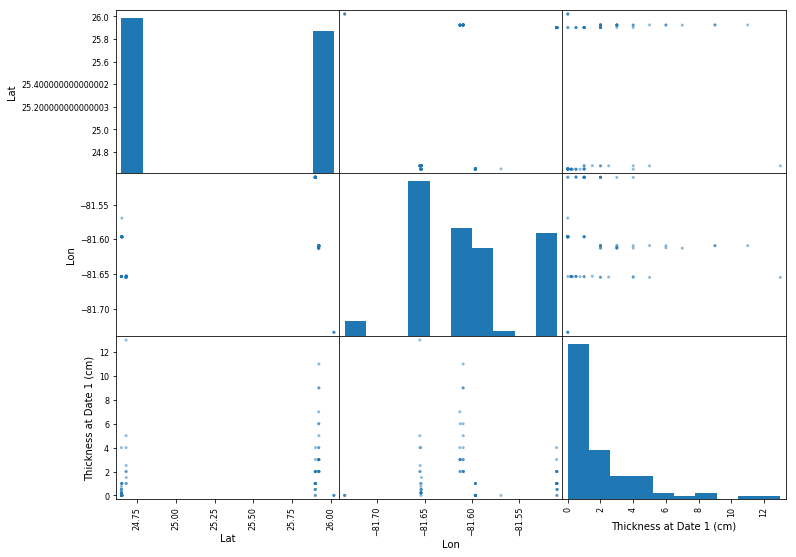

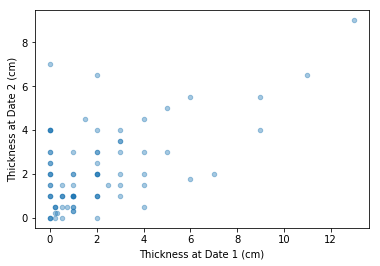

In [192]:
from pandas.tools.plotting import scatter_matrix
attributes = ['Lat', 'Lon', 'Thickness at Date 1 (cm)']
scatter_matrix(mud_num[attributes], figsize=(12, 9))
mud_num.plot(kind='scatter', x='Thickness at Date 1 (cm)', y='Thickness at Date 2 (cm)', alpha=0.4)

In [194]:
imputer.statistics_
mud_num.median().values
x = imputer.transform(mud_num)

AttributeError: 'Imputer' object has no attribute 'statistics_'

In [196]:
mud_num_tr = pd.DataFrame(x, columns=mud_num.columns)

ValueError: Shape of passed values is (4, 92), indices imply (6, 92)

In [80]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mud_cat = mud['Date 1']
mud_cat_encoded = encoder.fit_transform(mud_cat)
mud_cat_encoded
print(encoder.classes_)

[                          'NaT' '2017-11-17T00:00:00.000000000'
 '2017-11-18T00:00:00.000000000' '2017-11-19T00:00:00.000000000'
 '2017-12-18T00:00:00.000000000' '2017-12-19T00:00:00.000000000'
 '2017-12-20T00:00:00.000000000']


/home/catherinej/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:285: FutureWarning: In the future, NAT != NAT will be True rather than False.
  mask[1:] = aux[1:] != aux[:-1]


In [82]:
mud_cat = mud_train_set['Region']

In [89]:
def encode_text(data_frame):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    cat = data_frame['Site'] #, 'Region']
    cat_encoded = encoder.fit_transform(cat)
    
    return cat_encoded

In [200]:
mud_cat = encode_text(mud_train_set)
cat = ['Thickness at Date 1 (cm)', 'Thickness at Date 2 (cm)', 'Date 1', 'Date 2']
df1 = mud_test_set.dropna(subset=cat)
df1 = mud_num.drop('Station', axis=1)

KeyError: "['Station'] not found in axis"

In [9]:
def clean_dataframe(dataframe1, dataframe2):
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    cat = ['Thickness at Date 1 (cm)', 'Thickness at Date 2 (cm)', 'Date 1', 'Date 2']
    df1 = dataframe1.dropna(subset=cat)
    df2 = dataframe2.dropna(subset=cat)
    df1 = df1.replace('<0.1', 0)
    df1 = df1.replace('<1', .5)
    df2 = df2.replace('<0.1', 0)
    df2 = df2.replace('<1', .5)
    
    drop_columns = ['Date 1', 'Date 2', 'Notes']
    df1 = df1.drop(drop_columns, axis=1) 
    df2 = df2.drop(drop_columns, axis=1)
    
    return df1, df2


def categorize_text(df1, df2):
    categories = df1.select_dtypes(include=[object]).columns
    df1_cat = pd.get_dummies(df1, columns=categories, drop_first=True)
    df2_cat = pd.get_dummies(df2, columns=categories, drop_first=True)
    return df1_cat, df2_cat
#     print(categories)
#     from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
    
#     enc = MultiLabelBinarizer()
#     cat_features = ['Region', 'Site', 'Station']
#     df1_cat = df1[cat_features]
#     df2_cat = df2[cat_features]
#     df1_enc = enc.fit_transform(df1_cat)
#     df2_enc = enc.fit_transform(df2_cat)
    
#     ohe = OneHotEncoder()
#     df1_hot = ohe.fit_transform(df1_enc)
#     df2_hot = ohe.fit_transform(df2_enc)
#     return df1_hot, df2_hot

# train_set = pd.concat([mud_train_set, train_code], axis=1)
train, test = clean_dataframe(mud_train_set, mud_test_set)
print(train)
train_code, test_code = categorize_text(train, test)
print(train_code)

    Region Site     Station Thickness at Date 1 (cm)  \
80     LFK  SNK      SNK 17                        5   
86     LFK  CBD          S5                        0   
90     LFK  CBD          S9                        0   
88     LFK  CBD          S7                        0   
0      TTI  CCB      CC1 S1                        0   
97     LFK  CBD         S16                        1   
24     TTI  BW3      BW3 S1                        6   
20     TTI  BW2      BW2 S9                        9   
82     LFK  CBD          S1                        0   
34     TTI  UFU   UFU MUD 1                        1   
35     TTI  UFU   UFU MUD 2                        1   
40     TTI  UFU   UFU MUD 7                        2   
76     LFK  SNK      SNK 13                      2.5   
70     LFK  SNK       SNK 7                        1   
51     TTI  UFU  UFU MUD 18                      0.5   
37     TTI  UFU   UFU MUD 4                        3   
120    LFK  WTZ          S6                     

In [170]:
mud_median = pd.DataFrame.median(train_code['Thickness at Date 1 (cm)'])

In [171]:
mud_median

1.0

In [198]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
help(lin_reg.fit)
# lin_reg.fit(train_code, test_code)

Help on method fit in module sklearn.linear_model.base:

fit(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : numpy array or sparse matrix of shape [n_samples,n_features]
        Training data
    
    y : numpy array of shape [n_samples, n_targets]
        Target values
    
    sample_weight : numpy array of shape [n_samples]
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.

